# Задание 2
## Вариант 5

## Импорты

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path

## Выгрузка данных

In [33]:
data_path = Path('./data/chess_games.csv')

if not data_path.exists():
    raise Exception("File not found")

df: pd.DataFrame = pd.read_csv(data_path)

moves_col = 'turns'
rated_col = 'rated'

print("Dataset loaded successfully")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Dataset loaded successfully
Shape: (20058, 16)
Columns: ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']


### Каких матчей сыграно больше: рейтинговых или обычных?

In [34]:
rated_games = df['rated'].sum()
unrated_games = len(df) - rated_games
print(f"Всего матчей:        {df.shape[0]:,}")
print(f"Рейтинговых матчей:  {rated_games:,}")
print(f"Обычных матчей:      {unrated_games:,}")
print(f"Больше сыграно:      {'рейтинговых' if rated_games > unrated_games else 'обычных'}")


Всего матчей:        20,058
Рейтинговых матчей:  16,155
Обычных матчей:      3,903
Больше сыграно:      рейтинговых


### Сколько матчей закончилось быстрее чем за 20 ходов?

In [35]:
print(f"Всего матчей:                  {df.shape[0]:,}")
print(f"Закончилось быстрее 20 ходов:  {(df['turns'] < 20).sum():,}")


Всего матчей:                  20,058
Закончилось быстрее 20 ходов:  1,661


### Выборочные характеристики

In [36]:
moves = df[moves_col]

sample_mean = np.mean(moves)
print(f"Выборочное среднее:    {sample_mean:.2f}")

# несмещенная дисперсия
sample_var = np.var(moves, ddof=1)
print(f"Выборочная дисперсия:  {sample_var:.2f}")

sample_median = np.median(moves)
print(f"Выборочная медиана:    {sample_median:.2f}")

q1 = np.percentile(moves, 25)
q3 = np.percentile(moves, 75)
iqr = q3 - q1
print(f"IQR:                   {iqr:.2f}")
# print(f"Q1: {q1:.2f}, Q3: {q3:.2f}")


Выборочное среднее:    60.47
Выборочная дисперсия:  1126.98
Выборочная медиана:    55.00
IQR:                   42.00


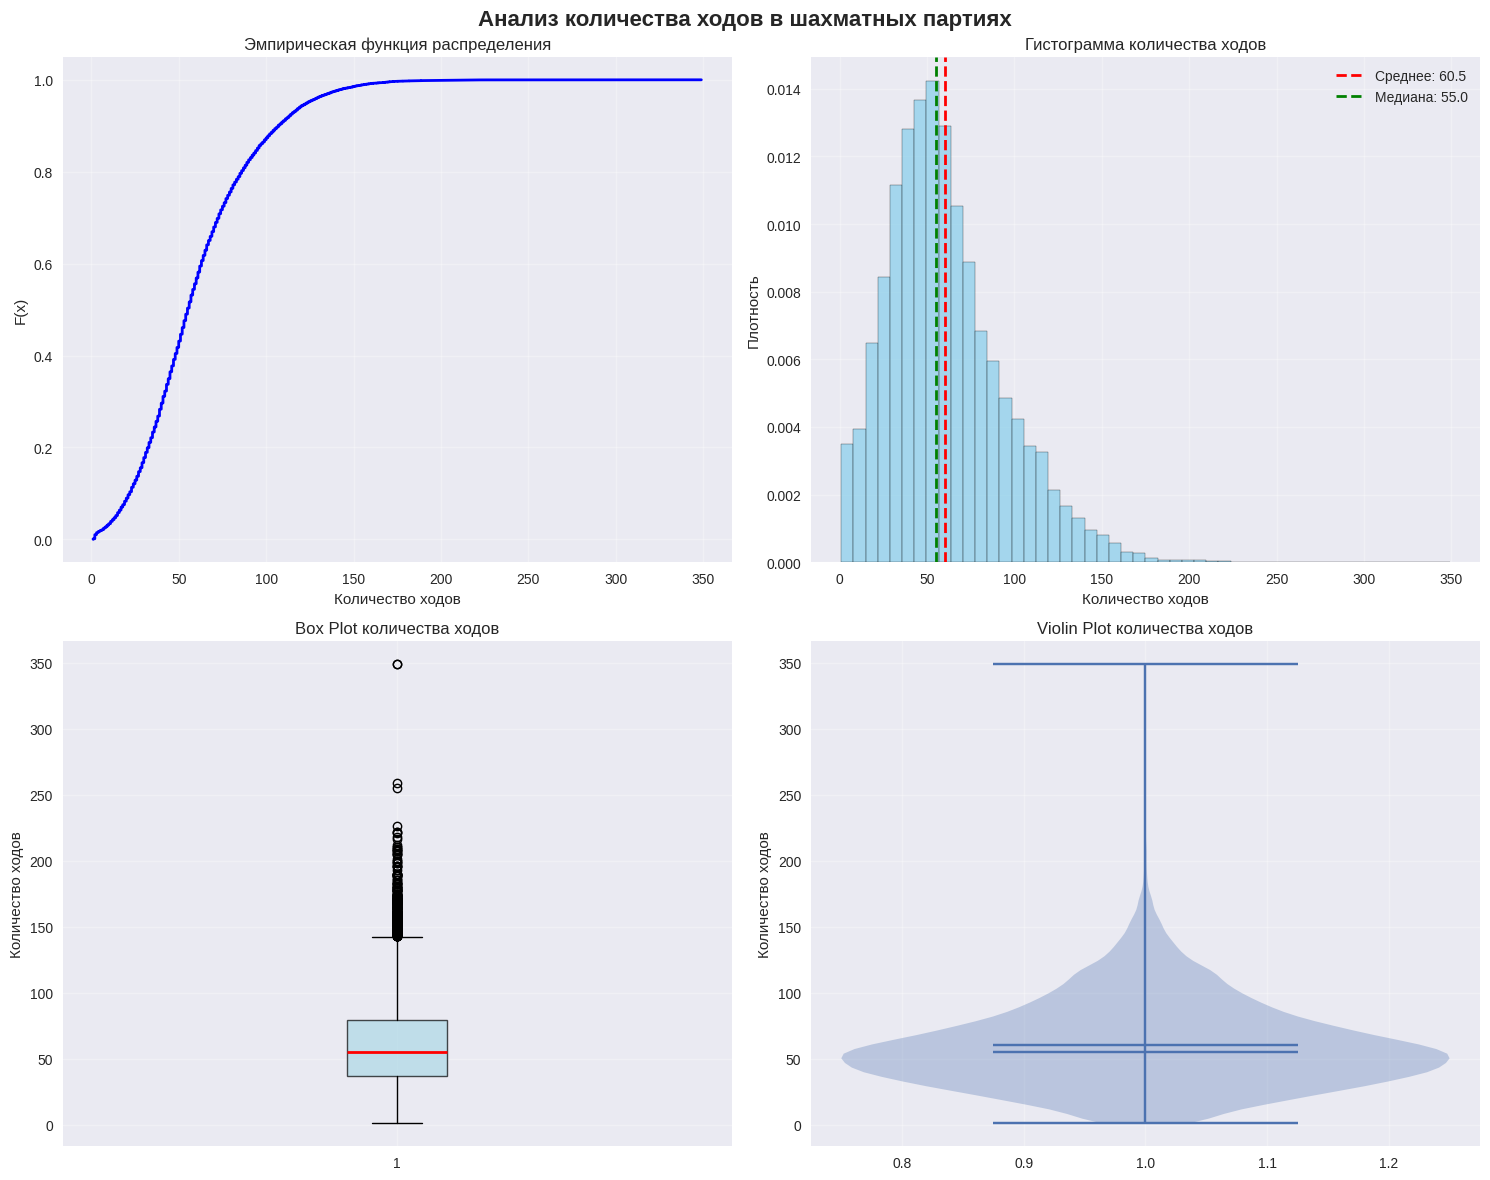

In [37]:
def plot_analysis(moves: pd.Series, description: str):
    plt.style.use('seaborn-v0_8')

    sample_mean = np.mean(moves)
    sample_var = np.var(moves, ddof=1)
    sample_median = np.median(moves)
    q1 = np.percentile(moves, 25)
    q3 = np.percentile(moves, 75)
    iqr = q3 - q1

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(description, fontsize=16, fontweight='bold')
    
    # 1. Эмпирическая функция распределения
    sorted_moves = np.sort(moves)
    ecdf_y = np.arange(1, len(sorted_moves) + 1) / len(sorted_moves)
    axes[0, 0].plot(sorted_moves, ecdf_y, linewidth=2, color='blue')
    axes[0, 0].set_xlabel('Количество ходов')
    axes[0, 0].set_ylabel('F(x)')
    axes[0, 0].set_title('Эмпирическая функция распределения')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Гистограмма
    axes[0, 1].hist(moves, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Среднее: {sample_mean:.1f}')
    axes[0, 1].axvline(sample_median, color='green', linestyle='--', linewidth=2, label=f'Медиана: {sample_median:.1f}')
    axes[0, 1].set_xlabel('Количество ходов')
    axes[0, 1].set_ylabel('Плотность')
    axes[0, 1].set_title('Гистограмма количества ходов')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Box plot
    axes[1, 0].boxplot(moves, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.7), medianprops=dict(color='red', linewidth=2))
    axes[1, 0].set_ylabel('Количество ходов')
    axes[1, 0].set_title('Box Plot количества ходов')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Violin plot
    axes[1, 1].violinplot(moves, vert=True, showmeans=True, showmedians=True)
    axes[1, 1].set_ylabel('Количество ходов')
    axes[1, 1].set_title('Violin Plot количества ходов')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_analysis(df[moves_col], 'Анализ количества ходов в шахматных партиях')
